# Assignment 0: Computer Vision Basics in Python

Step 1: Let's begin with a printing test. Print the words "Hello World!".

In [120]:
print('Hello World!')

Hello World!


Step 2: Before we can practice computer vision techniques, we need an image to work with. Go online and find a good one. 

Step 3: Now let's read in your image as a variable. That is, we're giving Python the path to our image, and expressing the image in a format that Python understands. 

In [123]:
import numpy as np
import cv2 

# Load a color image
img = cv2.imread('your_image.jpeg',1)
# Check out the documentation for the imread() function at: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html

Step 4: Now let's display your test image.

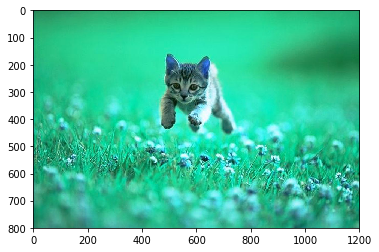

In [124]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

Step 5: Let's convert that image to grayscale and display it again. When we're working with images, this is often a really useful conversion. A color image takes up a lot of data: each RGB (red, green, blue color) channel contains an entire matrix of data that we might not necessarily need. So, we compress it to shades of grey. 

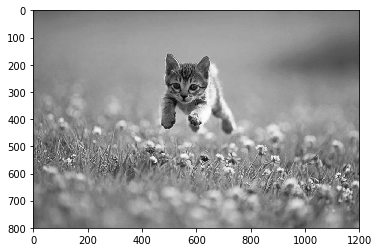

In [85]:
grey_img = cv2.cvtColor( img, cv2.COLOR_RGB2GRAY )
plt.imshow(grey_img, cmap='gray')
plt.show()

Step 6: Now let's save the grayscale image.

In [22]:
cv2.imwrite( "grey.png", grey_img )

True

Step 7: The grayscale image has been stored as a 2-D array (a matrix), whose entries give intensity values (the level of "grayness" at each pixel). Let's check the size of this matrix. 

In [36]:
[h, w] = np.shape(grey_img)
print('The width of the image is:', w, '\nThe height of the image is:', h)

The width of the image is: 1200 
The height of the image is: 800


Step 8: Let's practice thinking about this image as a matrix. First, extract one *row* of the matrix. Let's choose a row near the middle of the image.

In [38]:
row_num = 400
img_row = grey_img[400,:]

Step 9: Now, plot the intensity values along that row. 

Note: notice how the intensity values range between 0 (black) and 255 (white). Since 256 = 2^8, having 256 intensity options allows us to represent the color of each pixel with 8 bits (one byte) of information. It's an information-efficient binary encoding! 

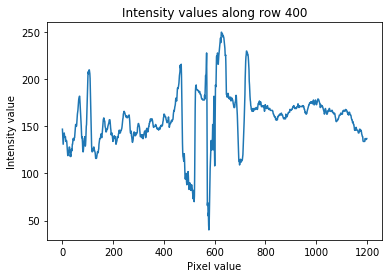

In [114]:
plt.plot(img_row)
plt.title('Intensity values along row ' + str(row_num))
plt.xlabel('Pixel value')
plt.ylabel('Intensity value')
plt.show()

Step 10: Which row did we analyze again? Let's knock out the intensity values in the vicinity of that row on the image, and display the image again.

Can you see the corresponding low- and high-intensity regions along this strip?

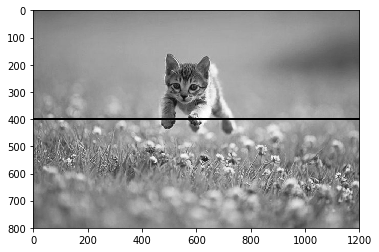

In [115]:
row_missing = grey_img.copy()
row_missing[row_num-2:row_num+2,:] = 0
plt.imshow(row_missing,cmap='gray')
plt.show()

Step 11: Now let's draw black vertical stripes on the image after every 20 pixels. Use a for loop to do this, by zero-ing out pixel values as before. Let's also save the image so that we can open the image separately and verify that the stripes are correct.

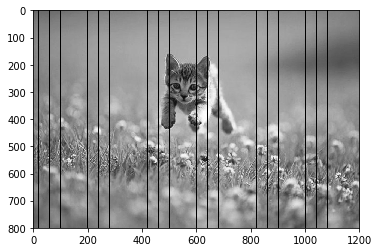

In [116]:
stripes_img = grey_img.copy()
for i in range(0, w, 20):
    stripes_img[:,i]=0
cv2.imwrite( "stripes.png", stripes_img )
plt.imshow(stripes_img,cmap='gray')
plt.show()

Step 12: Find the *index* of the pixel along your chosen row with the maximum intensity value. 

In [77]:
np.argmax(img_row)

626

Step 13: Now, flip the grayscale image upside-down! 

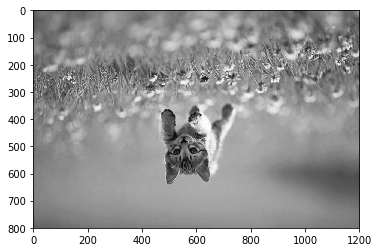

In [78]:
flipped_img = np.flipud(grey_img)
plt.imshow(flipped_img,cmap='gray')
plt.show()

Step 14: Use matplotlib to plot the original colored image and the flipped grayscale image side-by-side. 

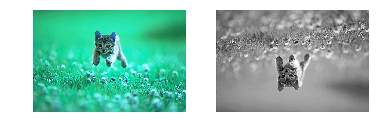

In [83]:
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.subplot(122)
plt.imshow(flipped_img,cmap='gray')
plt.axis('off')
plt.show()

Step 14: Now, let's read in this new image, "rice.png", as a grayscale image. We're going to practice thresholding.

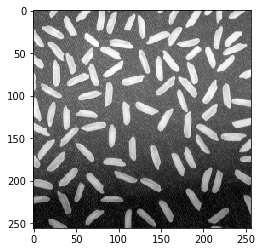

In [99]:
rice_img = cv2.imread('rice.png',0)
plt.imshow(rice_img, cmap='gray')
plt.show()

Step 15: We wish to separate the grains of rice in the foreground of this image from the darker background. So, we will "threshold" the image: that is, we choose an intensity value. Everything below this value is considered to be background, and everything above this value is considered to be foreground. Thus, we get a *binary mask*. Play around with different threshold values for comparison.

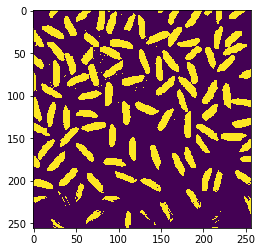

In [127]:
threshold_value =  130
ret,thresh1 = cv2.threshold(rice_img,threshold_value,255,cv2.THRESH_BINARY)
plt.imshow(thresh1)
plt.show()

Step 16: Now try thresholding your own image. What happens? 

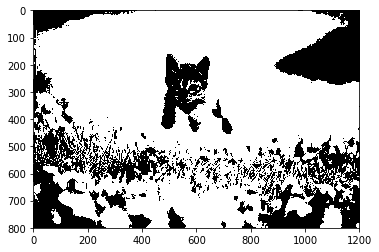

In [118]:
threshold_value =  130
ret,thresh1 = cv2.threshold(grey_img,threshold_value,255,cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')
plt.show()

Not so nice! Let's reconvene and discuss some of the challenges in computer vision. 